In [1]:
from paddleocr import PaddleOCR,draw_ocr

In [2]:
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to C:\Users\paulb/.paddleocr/whl\det\en\en_PP-OCRv3_det_infer\en_PP-OCRv3_det_infer.tar


100%|█████████████████████████████████████████████████████████████████████████████████| 3.86M/3.86M [00:09<00:00, 428kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to C:\Users\paulb/.paddleocr/whl\rec\en\en_PP-OCRv3_rec_infer\en_PP-OCRv3_rec_infer.tar


100%|████████████████████████████████████████████████████████████████████████████████| 9.96M/9.96M [00:09<00:00, 1.05MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\paulb/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar


100%|████████████████████████████████████████████████████████████████████████████████| 2.19M/2.19M [00:01<00:00, 1.48MiB/s]

[2022/08/31 22:50:55] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\paulb/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\paulb/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_

In [3]:
img_path = 'D:/Document_parser/artifacts/test.png'

In [46]:
result = ocr.ocr(img_path, cls=True)
len(result)

[2022/08/31 23:51:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.3863494396209717
[2022/08/31 23:51:36] ppocr DEBUG: cls num  : 27, elapse : 0.25264668464660645
[2022/08/31 23:51:46] ppocr DEBUG: rec_res num  : 27, elapse : 9.9864661693573


26

In [22]:
predictions_list = set()
for i in result:
    predictions_list.add(i[1])


In [23]:
# jsonifed output
predictions_list

{(' and Tobago, Guyana, Suriname, other parts of the Caribbean, Fiji, Mauritius, South Africa [11] the United States, and Europe. In the Gregorian calendar, Ganesh Chaturthi falls between 22 August and 20 September every',
  0.9830901622772217),
 (' the tenth day after start, when the idol is carried in a public procession with music and group chanting. then immersed in a nearby body of water such as a river or sea, called visarjan. In Mumbai alone, around 150,000 statues',
  0.9844338893890381),
 ('1 History', 0.9999098181724548),
 ('1.1 Ganesha', 0.9988932013511658),
 ('1.2 Festival', 0.9982694983482361),
 ('10 External links', 0.9877817630767822),
 ('2 Celebration in India', 0.999783456325531),
 ('2.1 Domestic celebration', 0.9923374056816101),
 ('2.2 Public celebration', 0.9977213144302368),
 ('2.3 At prominent temples', 0.9942087531089783),
 ('3 Celebration outside India', 0.9982513189315796),
 ('4 Foods', 0.9998236298561096),
 ('5 Environmental impact', 0.9998762011528015),
 ('6 

In [50]:
with open('random.txt', 'w+') as f:
    
    for txt in result:
        f.write('\n-------------------------\n')
        f.write(txt[1][0])

In [45]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path=r'D:\Document_parser\artifacts\simfang.ttf')
print(im_show)
im_show = Image.fromarray(im_show)
im_show.save(r'D:\Document_parser\artifacts\prediction\result.jpg')

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]]


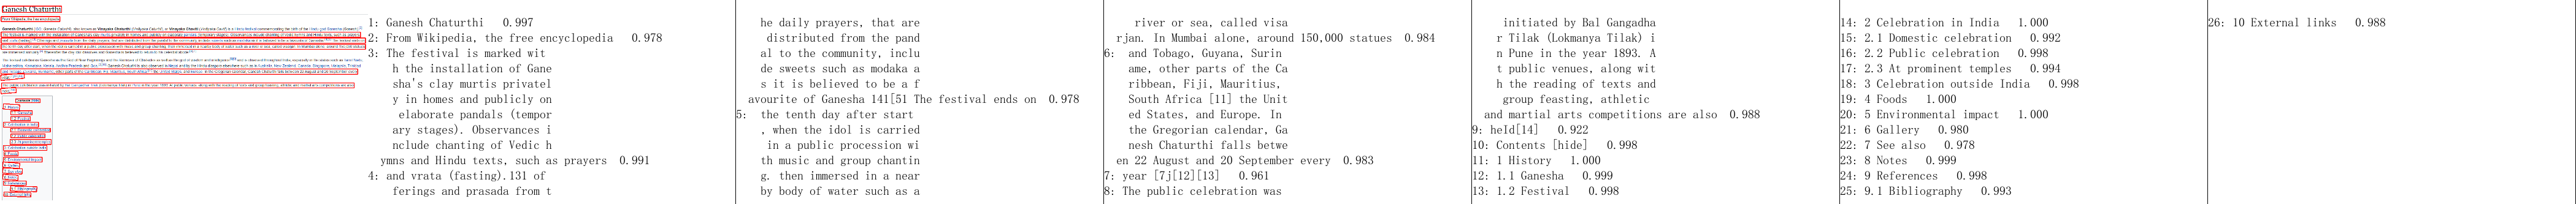

In [44]:
im_show